<a href="https://colab.research.google.com/github/EMAT31530/ai-group-project-music-classification/blob/master/Playlist_Spotify_API_Spectrogram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Spotify's API
Calling song previews of playlist songs





In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
pip install spotipy --upgrade

     |████████████████████████████████| 61kB 2.5MB/s 
     |████████████████████████████████| 153kB 14.3MB/s 
ERROR: google-colab 1.0.0 has requirement requests~=2.23.0, but you'll have requests 2.25.1 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


## Working Preview Download

In [6]:
import numpy as np
import pandas as pd

#Initiate Spotipy
import spotipy
import spotipy.util as util
from spotipy.oauth2 import SpotifyClientCredentials

scope = 'playlist-modify-public'
username = 'charliesmall'
client_id = 'e8cc5f6e144043cdbf2f47843d34c95e'
client_secret = '3f212de52da341e3b1baba9c7a95940c'

In [14]:
#Use requests library to download audio preview from preview_url
#https://www.tutorialspoint.com/downloading-files-from-web-using-python
import requests
url = 'https://p.scdn.co/mp3-preview/4c89633160d689619cacda408e08ee4365cc60ec?cid=e8cc5f6e144043cdbf2f47843d34c95e'
r = requests.get(url, allow_redirects=True)
print(r.headers.get('content-type'))
open('october.mp3', 'wb').write(r.content)

audio/mpeg


362861

In [41]:
import shutil
import os
shutil.rmtree('playlist')
path1 = os.path.join('/content/playlist/audio3sec')
os.makedirs(path1)
path2 = os.path.join('/content/playlist/images')
os.makedirs(path2)
path3 = os.path.join('/content/playlist/audio30sec')
os.makedirs(path3)

In [32]:
url_list = ('4YjpqCSDD7zwMQgPYJMqb0',
            '776Uo845nYHJpNaStv1Ds4',
            '2U1vwQRYQmG7ypKJF1JTEb',
            '6YP21EZOajDkBEHKPX3kYt',
            '5NtMqQLCzdVvL7F8vFp3zM',
            '0zodxoaogKBIOzB0c0zFUO',
            '3u9rbdcmA6CxjxOAkjaeFr',
            '06PCe6OiavknZiaqIGsULW',
            '1gtmuSSPr9dQKaLWHooNew',
            '6Q3qJNFjIPfKQYKL6oF708',
            '710FHFQeXKC6dZGCxt7kQh',
            '6PEMFpe3PTOksdV4ZXUpbE',
            '5LhTec3c7dcqBvpLRWbMcf',
            '6f5lOlSFJw9K79gaNnmWAd',
            '6QDPfX2YaZAGJnhpClg8Jo',
            '0kbYTNQb4Pb1rPbbaF0pT4',
            '6gkWznnJkdkwRPVcmnrays',
            '2S5hlvw4CMtMGswFtfdK15',
            '7Hvq85OU8T7Hsd63zNBwaL',
            '3PP6ghmOlDl2jaKaH0avUN',
            '0nwTtqff9SoWoTnTFeZ7YA',
            '6BdSOHfQ6kMg0tbAFlXR1z',
            '3kjuyTCjPG1WMFCiyc5IuB',
            '0YC192cP3KPCRWx8zr8MfZ',
            '4svpOyfmQKuWpHLjgy4cdK',
            '31uyAcnY0kjjKKIQZMKX4i',
            '6xnvNmSzmeOE1bLKnYXKW3',
            '2wzMOQwNT6ZvVB4amvhFAH',
            '6eHPmq8aR8X4TZIMvrD9Bo'

            )

In [3]:
sp_art = 'spotify:artist:'
print(sp_art + '293zczrfYafIItmnmM3coR')

spotify:artist:293zczrfYafIItmnmM3coR


In [42]:

# create empty lists where the results are going to be stored
artist_name = []
track_name = []
preview_url =[]
track_id = []
path_audio = []
path_images = []

for artist in url_list:
  #unwound = 'spotify:artist:4YjpqCSDD7zwMQgPYJMqb0'
  # sp_art = 'spotify:artist:'
  sp = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials(client_id=client_id, client_secret=client_secret))
  results = sp.artist_top_tracks('spotify:artist:' + artist)



  for track in results['tracks'][:1]:
      print('track    : ' + track['name'])
      print('audio    : ' + track['preview_url'])
      print()

      name = track['name']
      track_name.append(name)

      path1 = os.path.join('/content/playlist/audio3sec/',f'{name}')
      os.makedirs(path1)

      artist_name.append(track['artists'][0]['name'])
      track_id.append(track['id'])

    
      url = track['preview_url']
      preview_url.append(url)
      #print('cover art: ' + track['album']['images'][0]['url'])
    
      r = requests.get(url, allow_redirects=True)
      preview_path = f'/content/playlist/audio30sec/{name}.wav'
      with open(preview_path, 'wb') as file:
        file.write(r.content)
      path_audio.append(preview_path)


track    : Corpse Pose
audio    : https://p.scdn.co/mp3-preview/f50065cb34fe5960da578bb86e4b9b99204fc3de?cid=e8cc5f6e144043cdbf2f47843d34c95e

track    : All Along the Watchtower
audio    : https://p.scdn.co/mp3-preview/5eec2933740ab3984340d5f004813f8275e1bb97?cid=e8cc5f6e144043cdbf2f47843d34c95e

track    : LEAVING HELL
audio    : https://p.scdn.co/mp3-preview/6101be5a0ff5bf415ffaf11f26e31b25069bf862?cid=e8cc5f6e144043cdbf2f47843d34c95e

track    : Love and or Hate Trigger
audio    : https://p.scdn.co/mp3-preview/49ef8aadd14dfed36058af1f1e950d9c47c8e0ed?cid=e8cc5f6e144043cdbf2f47843d34c95e

track    : Dsco
audio    : https://p.scdn.co/mp3-preview/f97f3c010eaf32e735733cda54b8a63e4712ae51?cid=e8cc5f6e144043cdbf2f47843d34c95e

track    : Diary of a Rose
audio    : https://p.scdn.co/mp3-preview/988700df9bc2d41b1b53bb8bd505f7d51d70c282?cid=e8cc5f6e144043cdbf2f47843d34c95e

track    : Abusey Junction
audio    : https://p.scdn.co/mp3-preview/671bee9854d8be96510396f4705bde7d7a535d77?cid=e8cc5

In [38]:
pip install pydub


In [39]:
pip install ffmpeg-python

In [43]:
df_tracks = pd.DataFrame({'artist_name':artist_name,'track_name':track_name,'track_id':track_id,'preview_url':preview_url,'preview_path':path_audio})
print(df_tracks.shape)
df_tracks.head()

(29, 5)


,artist_name,track_name,track_id,preview_url,preview_path
0,Unwound,Corpse Pose,0zjs4f3SvXV2oggjg8oGnA,https://p.scdn.co/mp3-preview/f50065cb34fe5960...,/content/playlist/audio30sec/Corpse Pose.wav
1,Jimi Hendrix,All Along the Watchtower,2aoo2jlRnM3A0NyLQqMN2f,https://p.scdn.co/mp3-preview/5eec2933740ab398...,/content/playlist/audio30sec/All Along the Wat...
2,R.A.P. Ferreira,LEAVING HELL,5RplAumrnS8IuLu9I22rKz,https://p.scdn.co/mp3-preview/6101be5a0ff5bf41...,/content/playlist/audio30sec/LEAVING HELL.wav
3,Client_03,Love and or Hate Trigger,3tgLyUGFY3ey4APKXh6JoW,https://p.scdn.co/mp3-preview/49ef8aadd14dfed3...,/content/playlist/audio30sec/Love and or Hate ...
4,Sweet Trip,Dsco,1OKkG3vxEuBBwLw1gCqdNW,https://p.scdn.co/mp3-preview/f97f3c010eaf32e7...,/content/playlist/audio30sec/Dsco.wav


In [44]:
# again measuring the time
##start = timeit.default_timer()

# empty list, batchsize and the counter for None results
rows = []
batchsize = 100
None_counter = 0

for i in range(0,len(df_tracks['track_id']),batchsize):
    batch = df_tracks['track_id'][i:i+batchsize]
    feature_results = sp.audio_features(batch)
    for i, t in enumerate(feature_results):
        if t == None:
            None_counter = None_counter + 1
        else:
            rows.append(t)
            
print('Number of tracks where no audio features were available:',None_counter)

#stop = timeit.default_timer()
#print ('Time to run this code (in seconds):',stop - start)

Number of tracks where no audio features were available: 0


In [45]:
df_audio_features = pd.DataFrame.from_dict(rows,orient='columns')
print("Shape of the dataset:", df_audio_features.shape)
df_audio_features.head()

Shape of the dataset: (29, 18)


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.353,0.910,9,-6.837,1,0.0518,0.000325,0.593000,0.2350,0.444,81.644,audio_features,0zjs4f3SvXV2oggjg8oGnA,spotify:track:0zjs4f3SvXV2oggjg8oGnA,https://api.spotify.com/v1/tracks/0zjs4f3SvXV2...,https://api.spotify.com/v1/audio-analysis/0zjs...,185467,4
1,0.438,0.805,8,-6.237,1,0.0624,0.002550,0.000057,0.0842,0.564,113.253,audio_features,2aoo2jlRnM3A0NyLQqMN2f,spotify:track:2aoo2jlRnM3A0NyLQqMN2f,https://api.spotify.com/v1/tracks/2aoo2jlRnM3A...,https://api.spotify.com/v1/audio-analysis/2aoo...,240800,4
2,0.599,0.723,5,-8.674,0,0.2050,0.239000,0.399000,0.1370,0.648,129.952,audio_features,5RplAumrnS8IuLu9I22rKz,spotify:track:5RplAumrnS8IuLu9I22rKz,https://api.spotify.com/v1/tracks/5RplAumrnS8I...,https://api.spotify.com/v1/audio-analysis/5Rpl...,164462,4
3,0.664,0.878,2,-4.694,1,0.0480,0.000104,0.883000,0.0902,0.216,133.993,audio_features,3tgLyUGFY3ey4APKXh6JoW,spotify:track:3tgLyUGFY3ey4APKXh6JoW,https://api.spotify.com/v1/tracks/3tgLyUGFY3ey...,https://api.spotify.com/v1/audio-analysis/3tgL...,300688,4
4,0.565,0.839,4,-5.161,0,0.0332,0.000335,0.113000,0.3290,0.855,134.980,audio_features,1OKkG3vxEuBBwLw1gCqdNW,spotify:track:1OKkG3vxEuBBwLw1gCqdNW,https://api.spotify.com/v1/tracks/1OKkG3vxEuBB...,https://api.spotify.com/v1/audio-analysis/1OKk...,191133,4


In [46]:
#Remove unnecessary columns
columns_to_drop = ['analysis_url','track_href','type','uri']
df_audio_features.drop(columns_to_drop, axis=1,inplace=True)

df_audio_features.rename(columns={'id': 'track_id'}, inplace=True)

df_audio_features.shape

(29, 14)

In [47]:
# merge both dataframes
# the 'inner' method will make sure that we only keep track IDs present in both datasets
df = pd.merge(df_tracks,df_audio_features,on='track_id',how='inner')
print("Shape of the dataset:", df_audio_features.shape)
df.head()

Shape of the dataset: (29, 14)


,artist_name,track_name,track_id,preview_url,preview_path,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Unwound,Corpse Pose,0zjs4f3SvXV2oggjg8oGnA,https://p.scdn.co/mp3-preview/f50065cb34fe5960...,/content/playlist/audio30sec/Corpse Pose.wav,0.353,0.910,9,-6.837,1,0.0518,0.000325,0.593000,0.2350,0.444,81.644,185467,4
1,Jimi Hendrix,All Along the Watchtower,2aoo2jlRnM3A0NyLQqMN2f,https://p.scdn.co/mp3-preview/5eec2933740ab398...,/content/playlist/audio30sec/All Along the Wat...,0.438,0.805,8,-6.237,1,0.0624,0.002550,0.000057,0.0842,0.564,113.253,240800,4
2,R.A.P. Ferreira,LEAVING HELL,5RplAumrnS8IuLu9I22rKz,https://p.scdn.co/mp3-preview/6101be5a0ff5bf41...,/content/playlist/audio30sec/LEAVING HELL.wav,0.599,0.723,5,-8.674,0,0.2050,0.239000,0.399000,0.1370,0.648,129.952,164462,4
3,Client_03,Love and or Hate Trigger,3tgLyUGFY3ey4APKXh6JoW,https://p.scdn.co/mp3-preview/49ef8aadd14dfed3...,/content/playlist/audio30sec/Love and or Hate ...,0.664,0.878,2,-4.694,1,0.0480,0.000104,0.883000,0.0902,0.216,133.993,300688,4
4,Sweet Trip,Dsco,1OKkG3vxEuBBwLw1gCqdNW,https://p.scdn.co/mp3-preview/f97f3c010eaf32e7...,/content/playlist/audio30sec/Dsco.wav,0.565,0.839,4,-5.161,0,0.0332,0.000335,0.113000,0.3290,0.855,134.980,191133,4


In [48]:
from google.colab import files

df.to_csv('playlist.csv')
files.download('playlist.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [49]:
n , m = df.shape

### Obtain Spectrograms using Librosa:

In [50]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

In [51]:
audio_path = df['preview_path'][0]
#audio_path = '/content/drive/MyDrive/GTZAN_Dataset/genres_original/rock/rock.00000.wav'
import IPython.display as ipd
ipd.Audio(audio_path)

In [52]:
df['track_name'][:]

0                                          Corpse Pose
1                             All Along the Watchtower
2                                         LEAVING HELL
3                             Love and or Hate Trigger
4                                                 Dsco
5                                      Diary of a Rose
6                                      Abusey Junction
7                                             Circuits
8                                          Like a Buoy
9                                        George Street
10                                    Strings of Light
11                                               Suede
12                                            All Caps
13                                             Send Me
14                            Peanuts Grow Underground
15    Blue in Green (feat. John Coltrane & Bill Evans)
16                                       We Are Family
17                                            Oblivion
18        

In [53]:
############## Convert 30sec into 3 second audio files ##########################
from pydub import AudioSegment
newSong = 'newSong'
i = 0
j=0
#print(f"{g}")
  #for filename in os.listdir(os.path.join('/content/drive/MyDrive/genres',f"{g}")):
for k in range(n):
  name = df['track_name'][k]
    #song  =  os.path.join(f'/content/drive/MyDrive/genres/{g}',f'{filename}')
  song_path = df['preview_path'][k]
  j = j+1
  for w in range(0,10):
    i = i+1
      #print(i)
    t1 = 3*(w)*1000
    t2 = 3*(w+1)*1000
    newAudio = AudioSegment.from_mp3(song_path)
    new = newAudio[t1:t2]
    new.export(f'/content/playlist/audio3sec/{name}/{name+str(w)}.wav', format="wav")

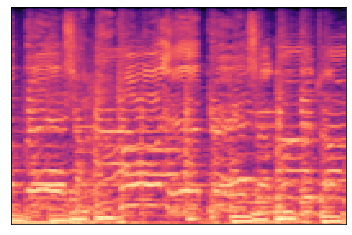

In [55]:
#################Convert 3sec in Spectrograms ##############################

for k in range(n):
  name = df['track_name'][k]
  path1 = os.path.join('/content/playlist/images/',f'{name}')
  os.makedirs(path1)
  j=0
  for filename in os.listdir(os.path.join('playlist/audio3sec',f"{name}")):
    song  =  os.path.join(f'playlist/audio3sec/',f"{name}",f'{filename}')

    y,sr = librosa.load(song,duration=3)
    #print(sr)
    mels = librosa.feature.melspectrogram(y=y,sr=sr)
    #fig = plt.Figure()
    #canvas = FigureCanvas(fig)
    #p = plt.imshow(librosa.power_to_db(mels,ref=np.max))
    #plt.savefig(f'playlist/images/{name}/{name+str(j)}.png')
    librosa.display.specshow(librosa.power_to_db(mels, ref=np.max))
    plt.savefig(f'playlist/images/{name}/{name+str(j)}.png',bbox_inches='tight',transparent=True, pad_inches=0)
    j = j+1